In [3]:
import numpy as np
import os

In [1]:
!ls

2D_slice_classifier.ipynb	       saliency_maps.ipynb
KITS_preliminary_task_data_prep.ipynb  sample.json
ScoreCAM			       scorecam_extraction.py
__pycache__			       test_file.npy
data_plan.md			       test_model
figs				       test_model2
mix_kidney_and_no_kidney.ipynb	       train_classifier.py
model_trainer.py		       trained_resnet
prep_data.ipynb			       utils.py
prepare_data.py


In [ ]:
os.getcwd()

In [4]:
os.chdir('/gpfs/space/home/joonas97/data/kits21/processed_2d_slices/segmentations')

In [5]:
np.random.seed(19) # fix seed
for i in ["scorecam"]:
    print(i+" data:")
    kidney_slices = np.load(i+"kidney_slices_seg.npy")
    no_kidney_slices = np.load(i+"no_kidney_slices_seg.npy")

    ## use this block only for subsampling validation data
    # np.random.shuffle(kidney_slices)
    # np.random.shuffle(no_kidney_slices)
    # kidney_slices = kidney_slices[:300]
    ##

    mixed_slices = np.concatenate((kidney_slices, no_kidney_slices[:kidney_slices.shape[0],:]))
    print("concantenated slices shape ",mixed_slices.shape)
    labels = np.concatenate((np.ones(kidney_slices.shape[0]), np.zeros(kidney_slices.shape[0])))
    print("labels shape ",labels.shape)

    np.save("segmentation_dataset_scorecam", mixed_slices)
    #np.save("smaller_val_labels", labels)


scorecam data:
concantenated slices shape  (3998, 512, 512)
labels shape  (3998,)


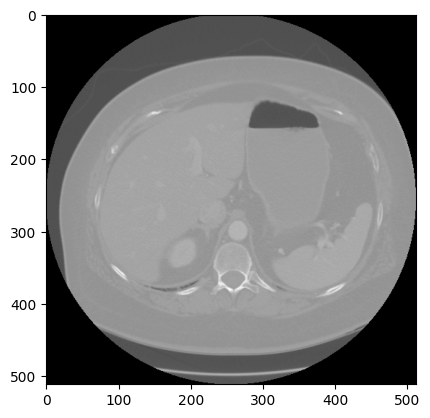

In [14]:
import matplotlib.pyplot as plt

plt.imshow(kidney_slices[250], cmap='gray')

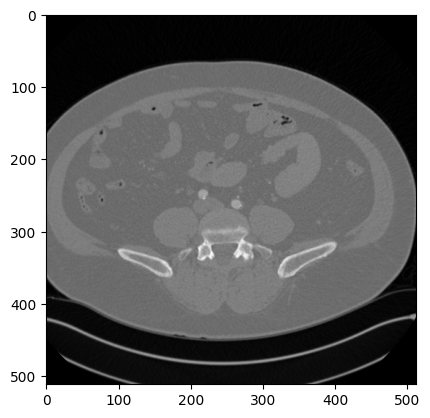

In [13]:
plt.imshow(no_kidney_slices[260], cmap='gray')

In [47]:
def shuffle_in_unison_scary(a, b):
    np.random.seed(19)
    rng_state = np.random.get_state()
    np.random.shuffle(a)
    np.random.set_state(rng_state)
    np.random.shuffle(b)

In [43]:
a = np.arange(10)
b = np.arange(10)

In [44]:
shuffle_in_unison_scary(a, b)

In [45]:
a

array([1, 7, 9, 6, 8, 4, 3, 0, 2, 5])

In [46]:
b

array([4, 9, 3, 0, 7, 8, 1, 5, 2, 6])